In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

import torch
from torch import nn

In [2]:
path = 'https://raw.githubusercontent.com/fateme-alk/learning/main/autoencoder/weatherAUS.csv'
df = pd.read_csv(path)

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## choose featturs before do any statistical analysis

In [7]:
df.drop(axis=1, inplace=True, columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [8]:
df.shape

(145460, 18)

## Pre-processing

### Missing Values

In [9]:
missing_df = df.isnull()

In [10]:
missing_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
def find_missing_columns(missing_df):
  missing_columns= []
  for column in missing_df.columns:
    if True in missing_df[column].unique():
      missing_columns.append(column)
  return missing_columns

def show_missing_column(df, missing_df, missing_columns):
  for column in missing_columns:
      print(f"""
            {column}
            {missing_df[column].value_counts().to_dict()}
            {df[column].unique()}
            {df[column].unique().dtype}
            # {'-' * 70}
          """)

In [12]:
missing_columns = find_missing_columns(missing_df)

In [13]:
show_missing_column(df, missing_df, missing_columns)


            MinTemp
            {False: 143975, True: 1485}
            [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.   0.8 -0.1  1.3  3.3  6.5 -0.8
  1.9  6.8  2.7  1.6  5.5  7.3  0.2  5.8  7.1  1.1  1.   6.1  nan  5.3
  4.  11.7  8.5  3.8  6.4  9.5 14.5 15.6 17.8 16.7 18.1 12.1 11.4 18.3
 11.9 

In [14]:
# before drop rows as solution to behave with missing values
df.shape

(145460, 18)

In [15]:
# two below lines are equal
df.dropna(axis=0, inplace=True)
# df.dropna(axis=0, inplace=True, how='any')

In [16]:
# after drop rows as solution t behave with missing values
df.shape

(58090, 18)

### Convert Categorical Fearture to Numerical Feature

In [17]:
df.loc[df['RainToday'] == 'No', 'RainToday'] = 0
df.loc[df['RainToday'] == 'Yes', 'RainToday'] = 1

In [18]:
df['RainToday'].unique()

array([0, 1], dtype=object)

In [19]:
# below two solution has same result

# label_encoder = LabelEncoder()
# df['RainToday'] = label_encoder.fit_transform(df['RainToday'])

df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})


In [20]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,45361
1,12729


### Normalization



### Data Formatting - Data Transfomation

### Binning

## Data splitting

In [21]:
predictors = df.drop(axis=1, columns=['RainTomorrow'])
target = df['RainTomorrow']

In [22]:
predictors

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0


In [23]:
target

,RainTomorrow
6049,0
6050,0
6052,0
6053,0
6054,0
...,...
142298,0
142299,0
142300,0
142301,0


In [26]:
def draw_plot(df, feature, target):
  plt.figure(figsize=(18, 10), frameon=False)
  plt.suptitle(feature)

  plt.subplot(2, 2, 1)
  sns.histplot(df, x=feature, discrete=True)

  plt.subplot(2, 2, 2)
  sns.boxplot(df, x=feature)

  if feature != target:
    plt.subplot(2, 2, 3)
    sns.scatterplot(df, x=feature, y=target)

  plt.subplot(2, 2, 4)
  sns.kdeplot(df, x=feature)

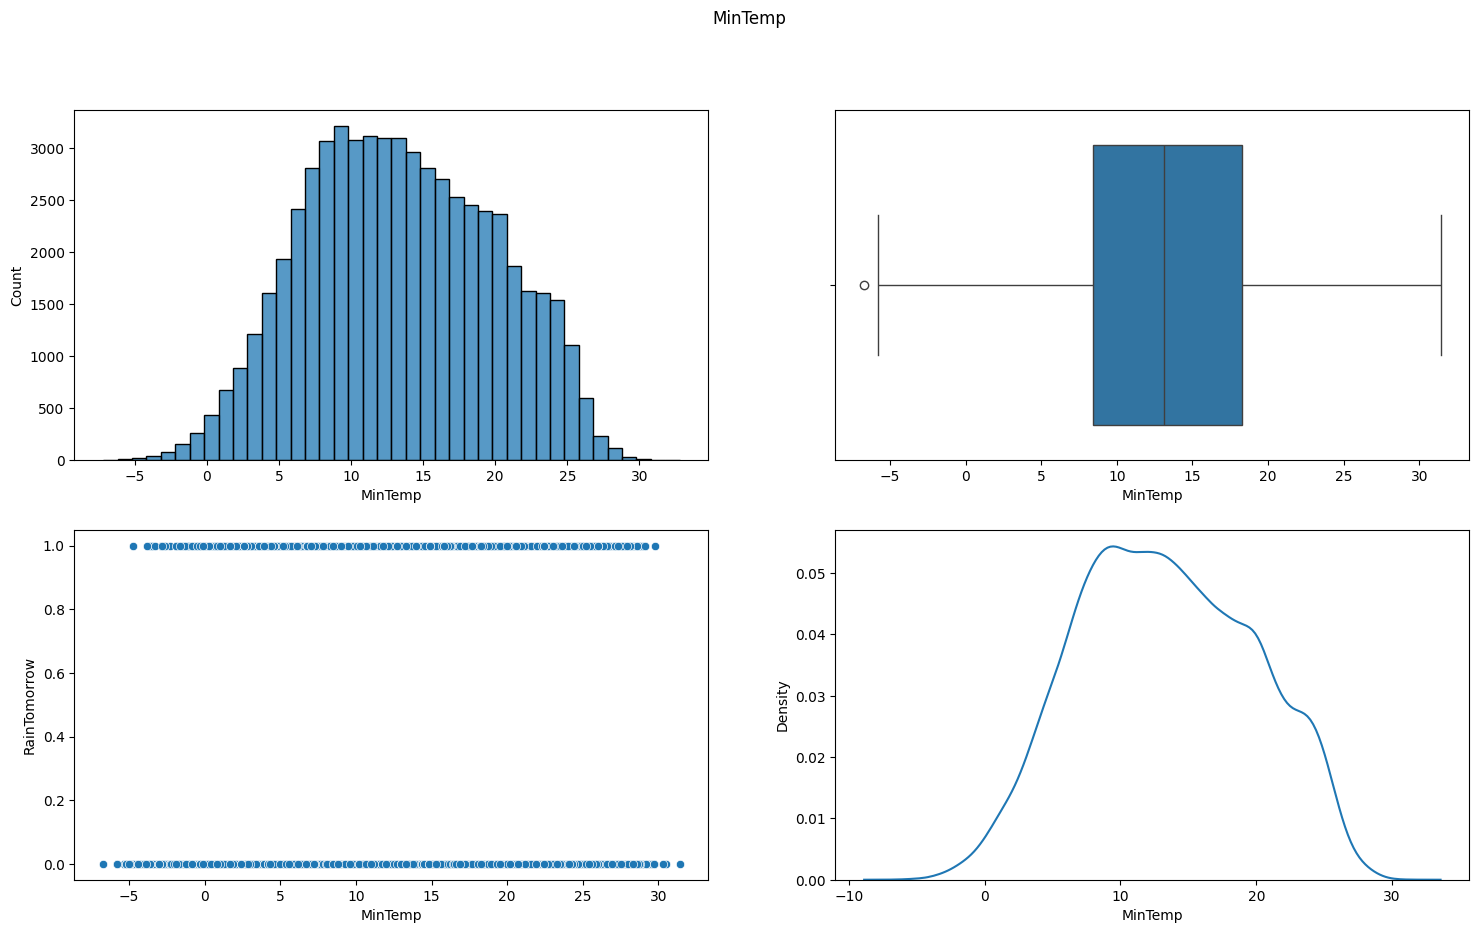

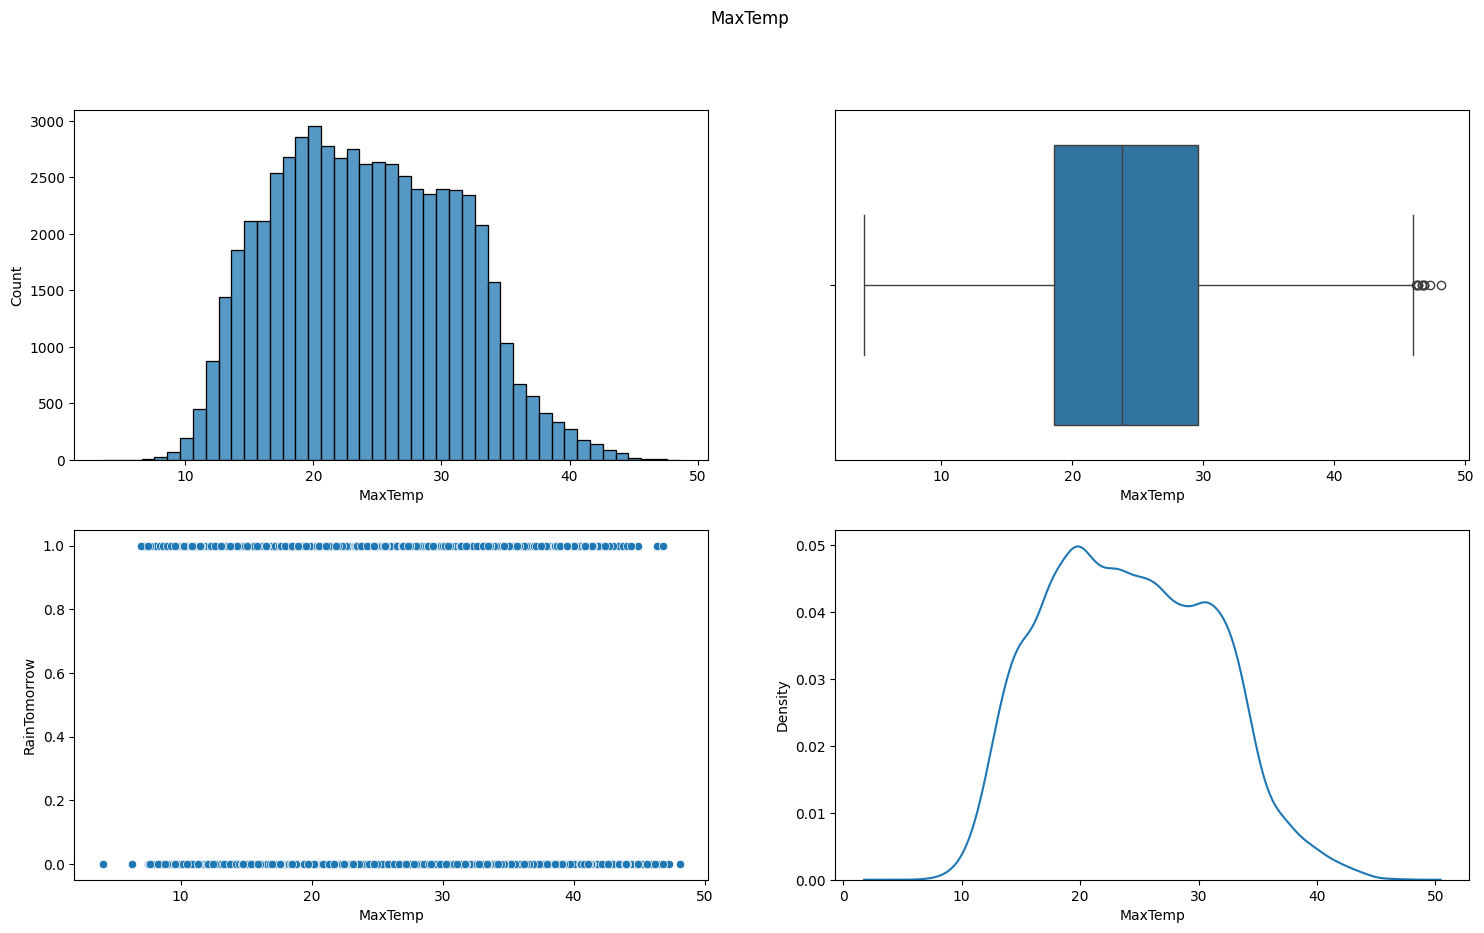

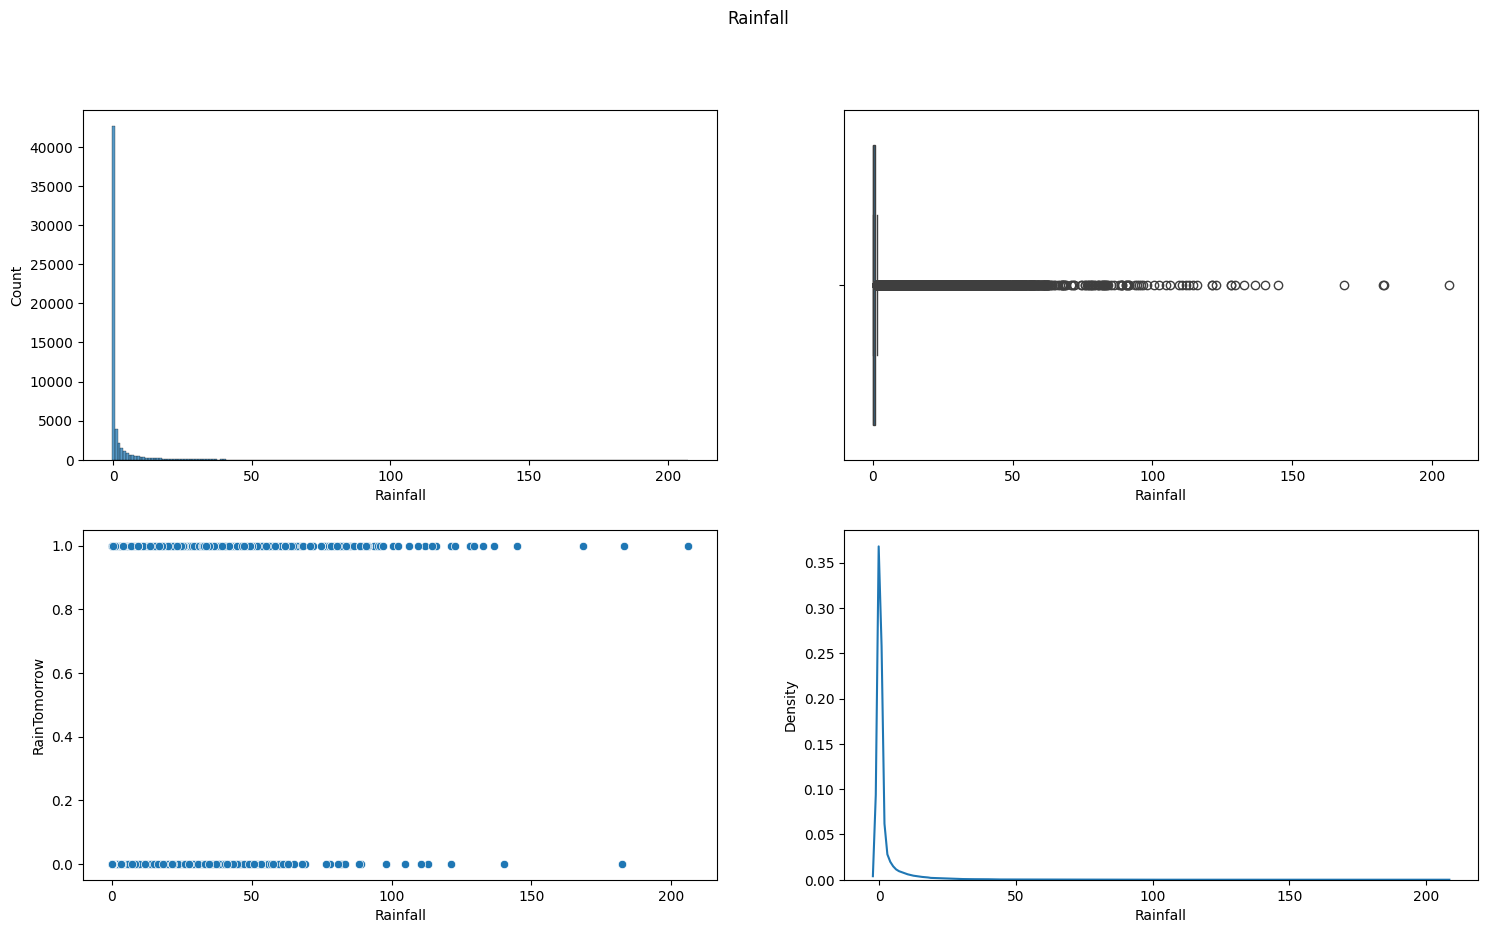

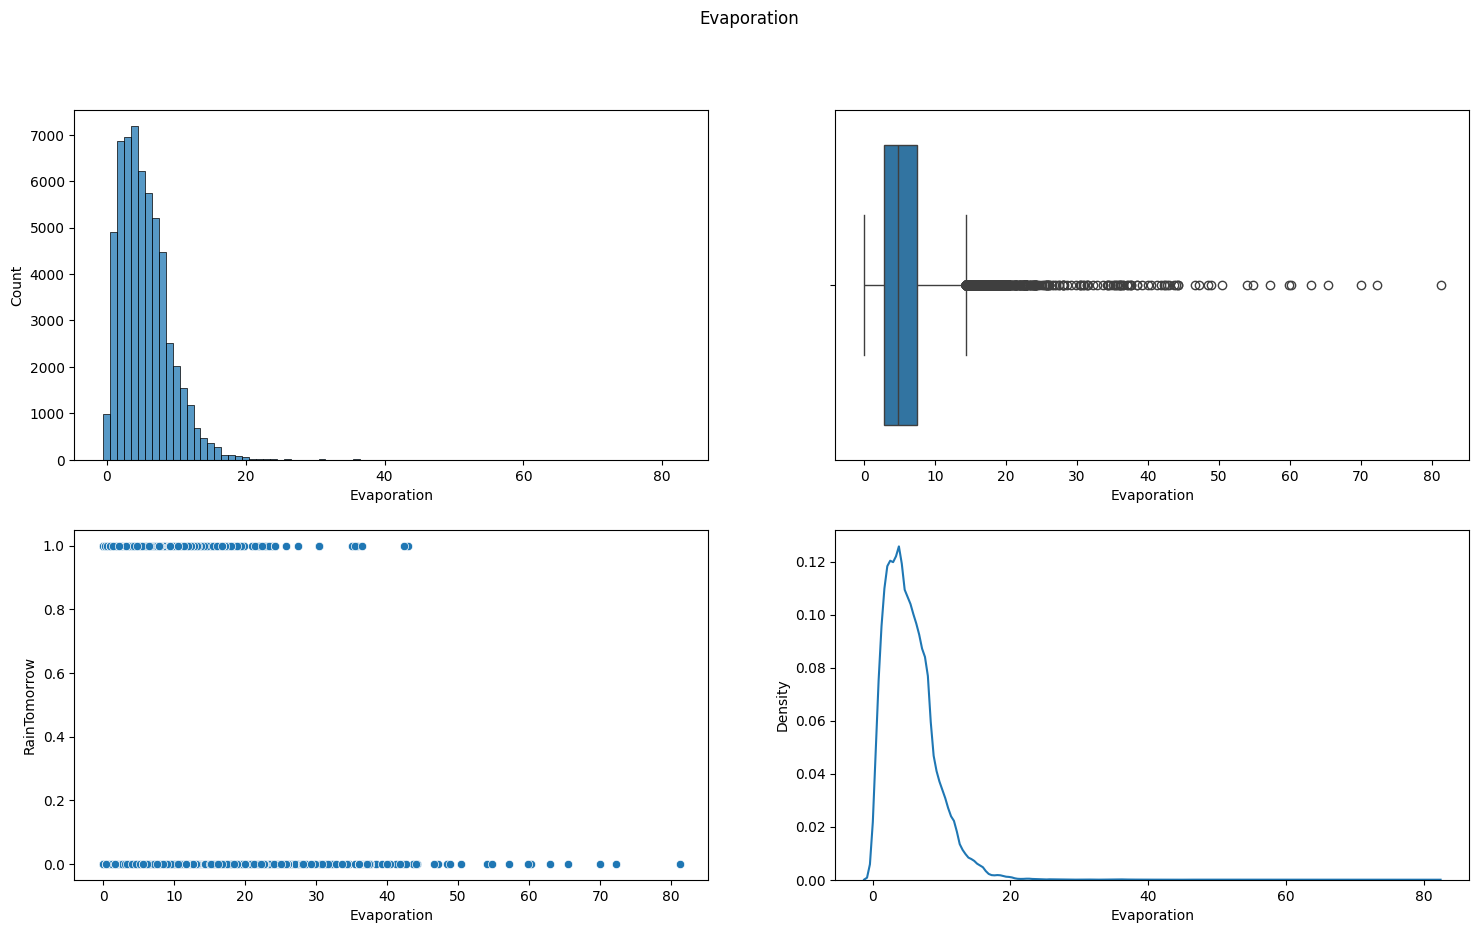

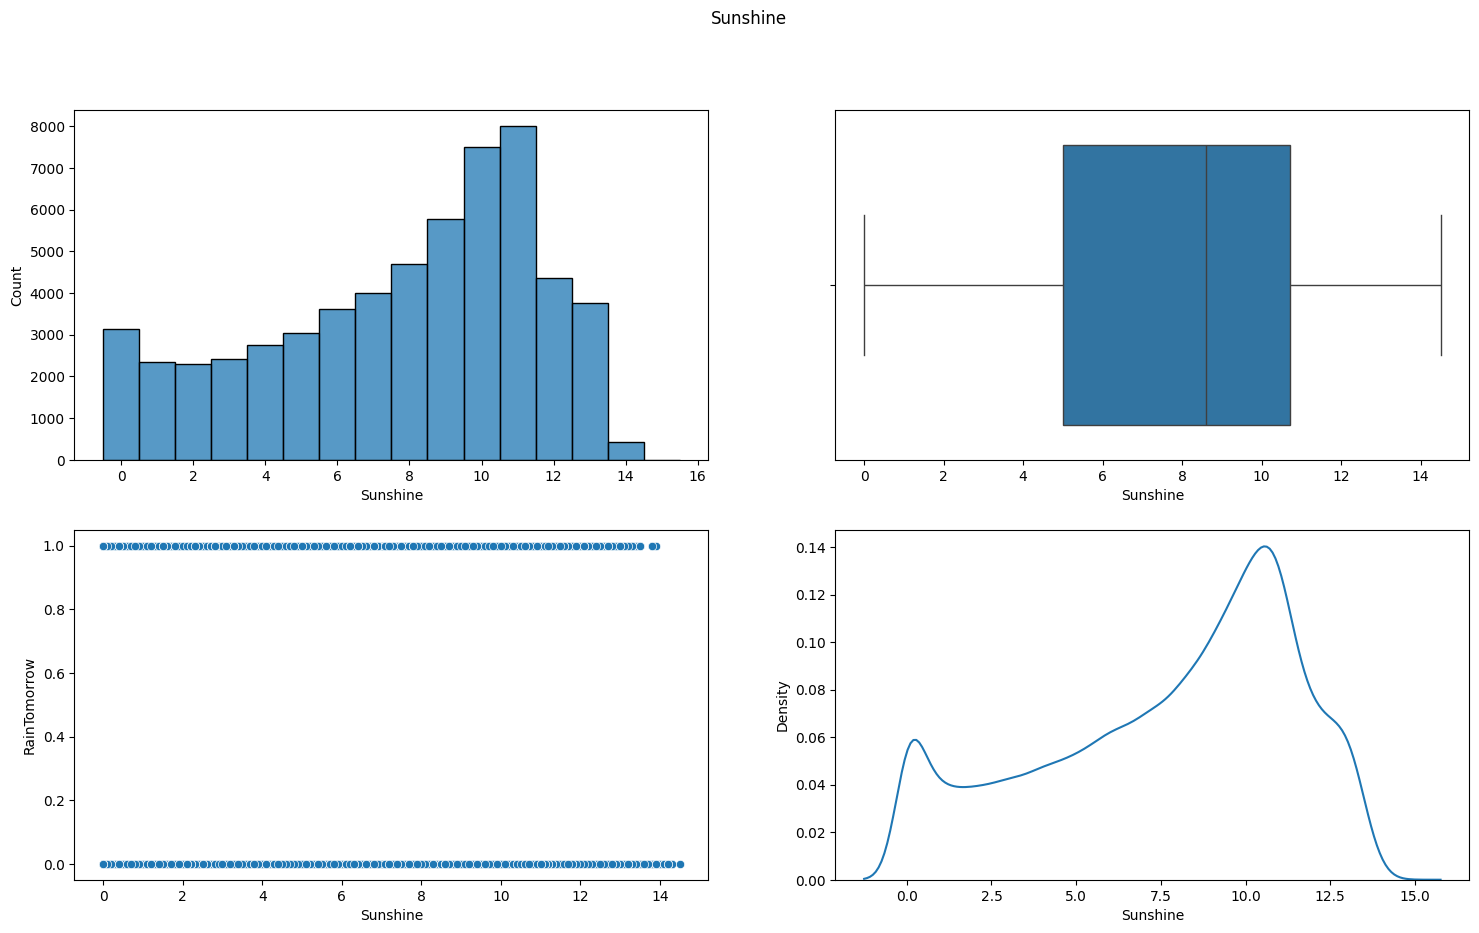

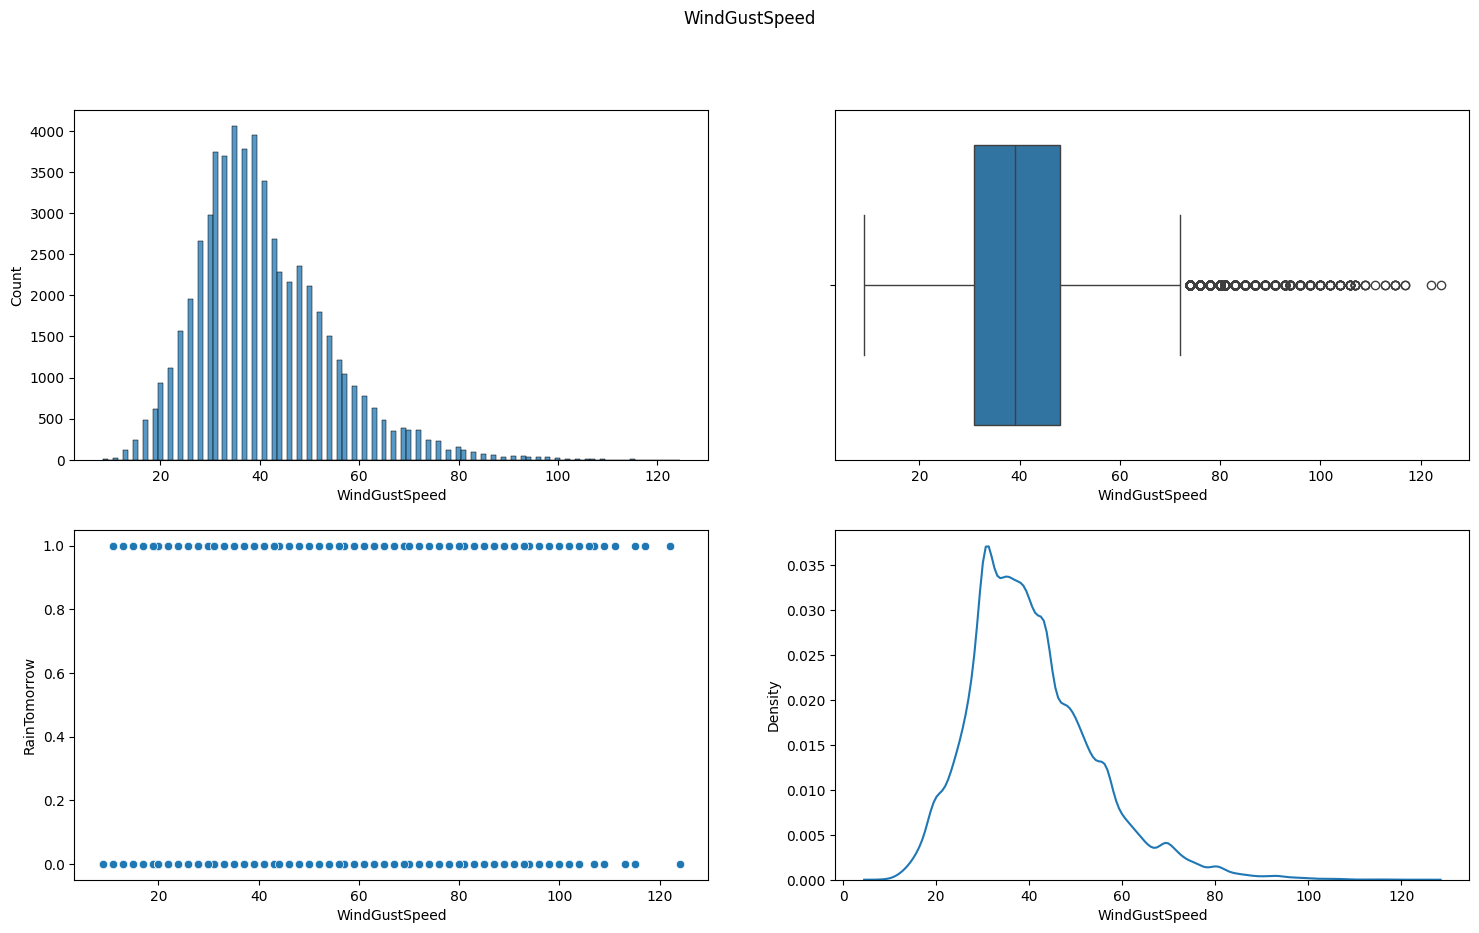

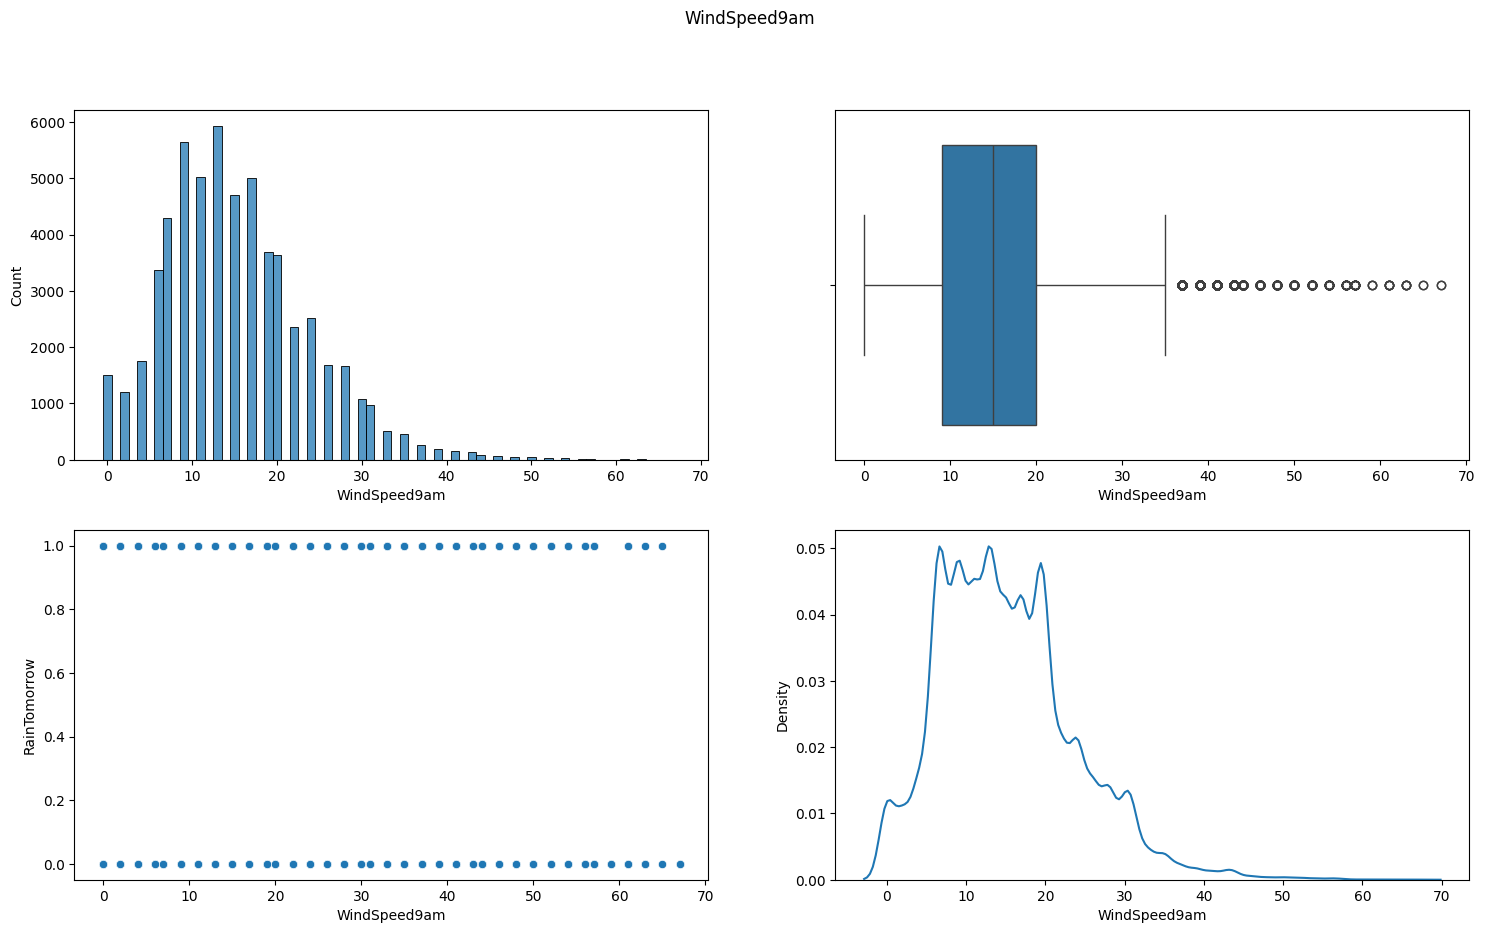

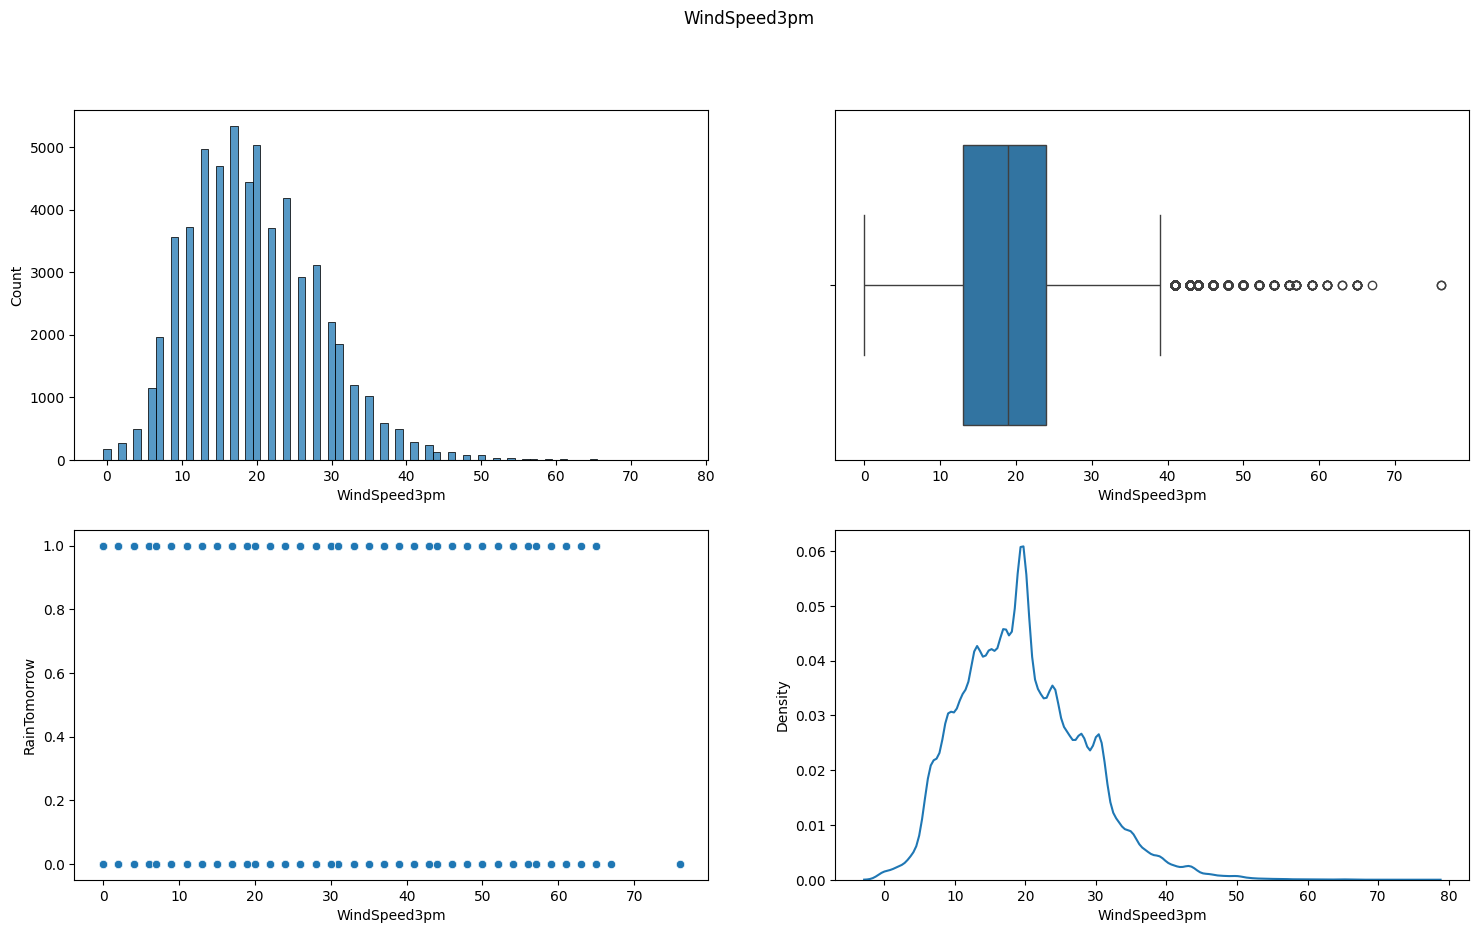

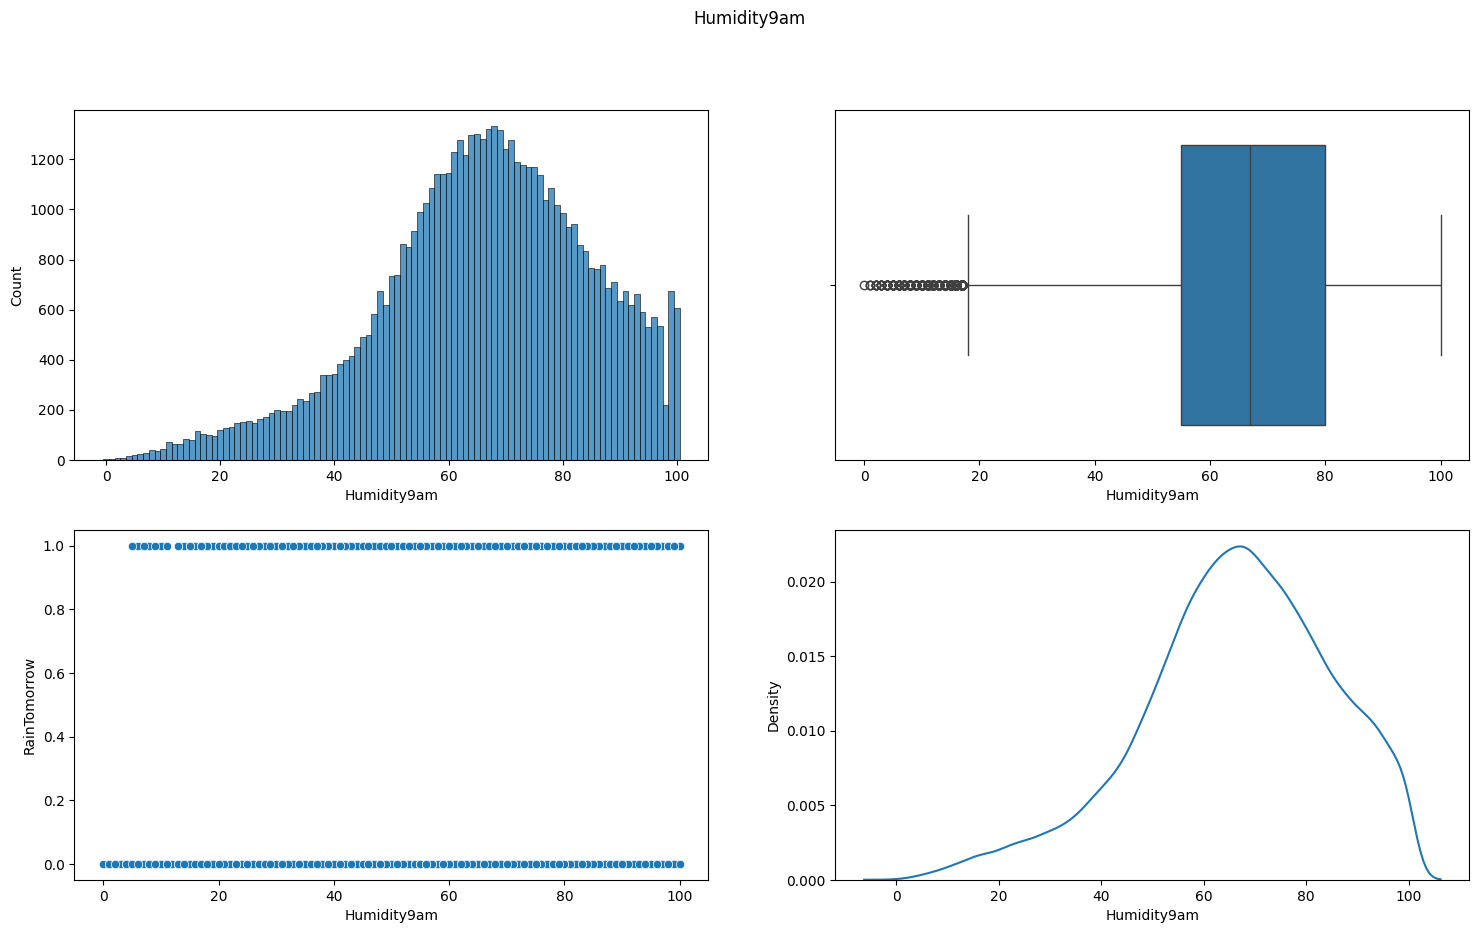

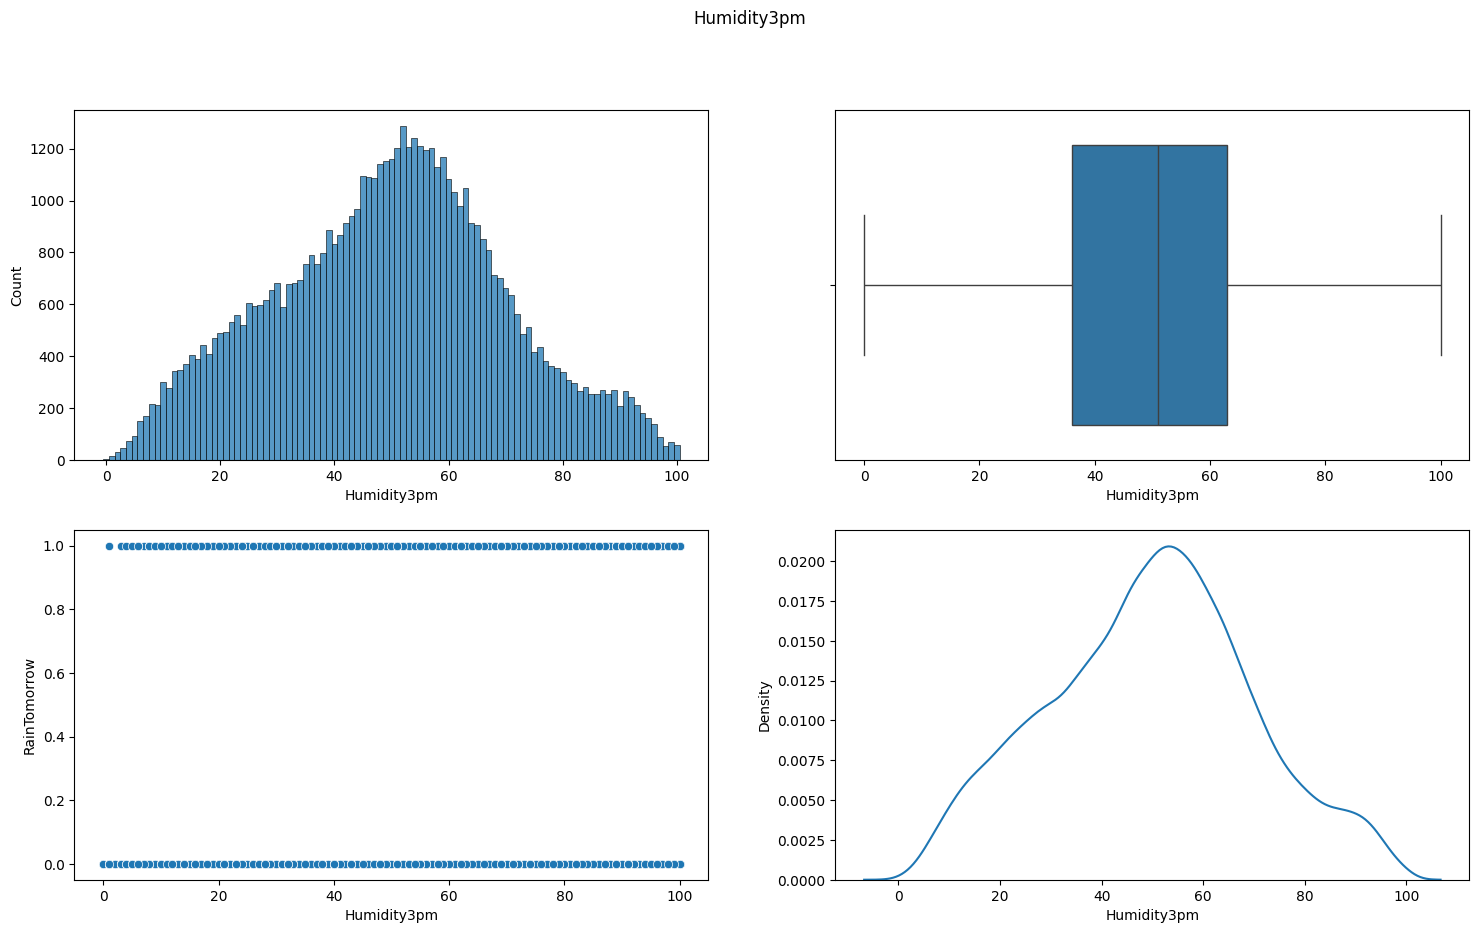

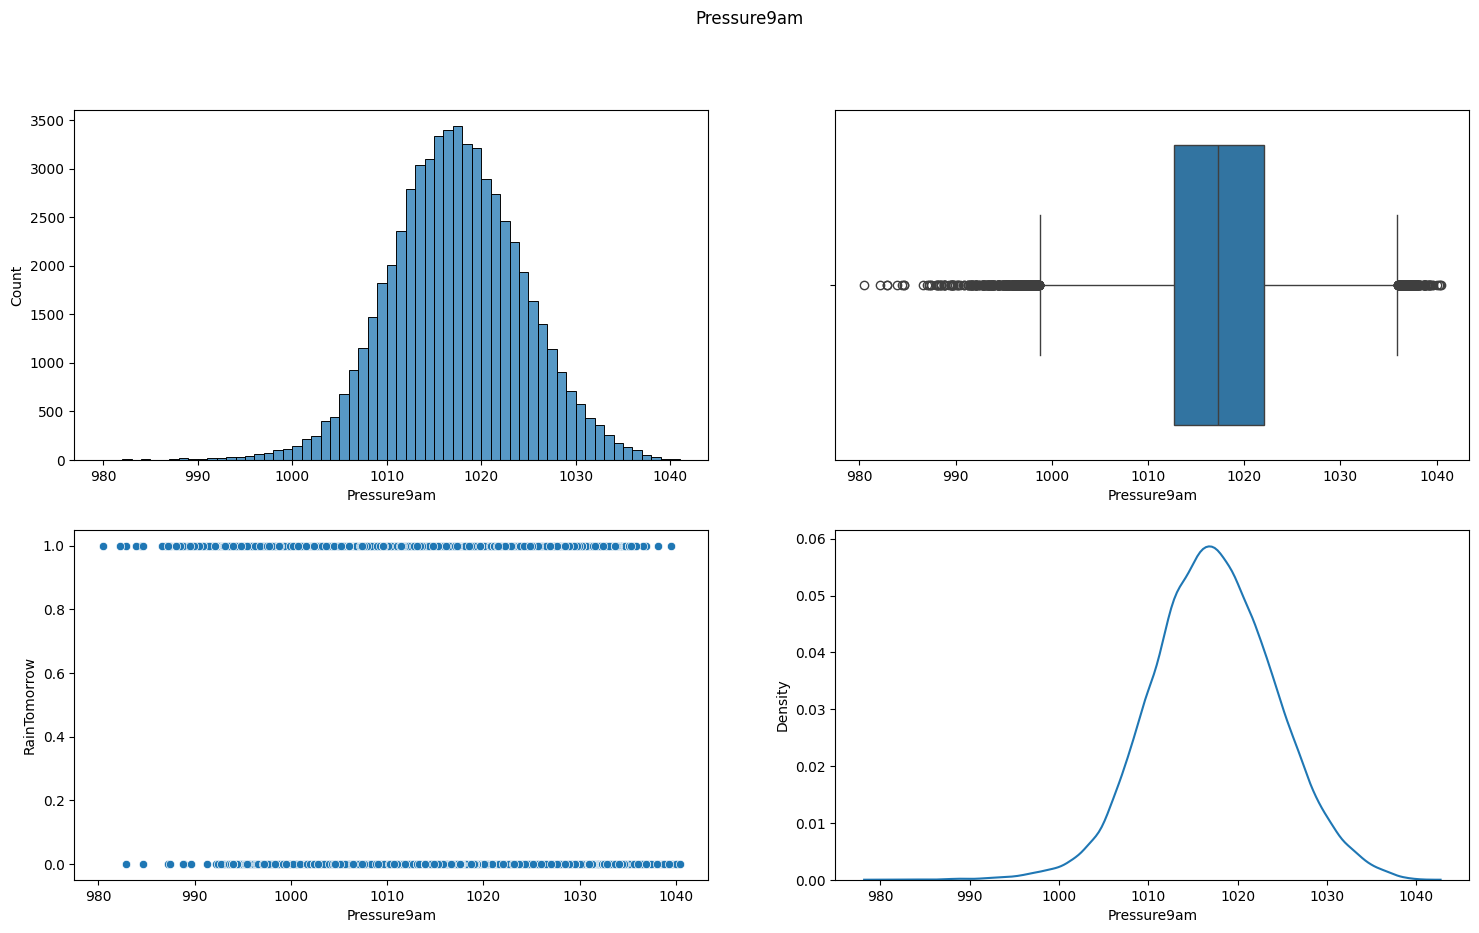

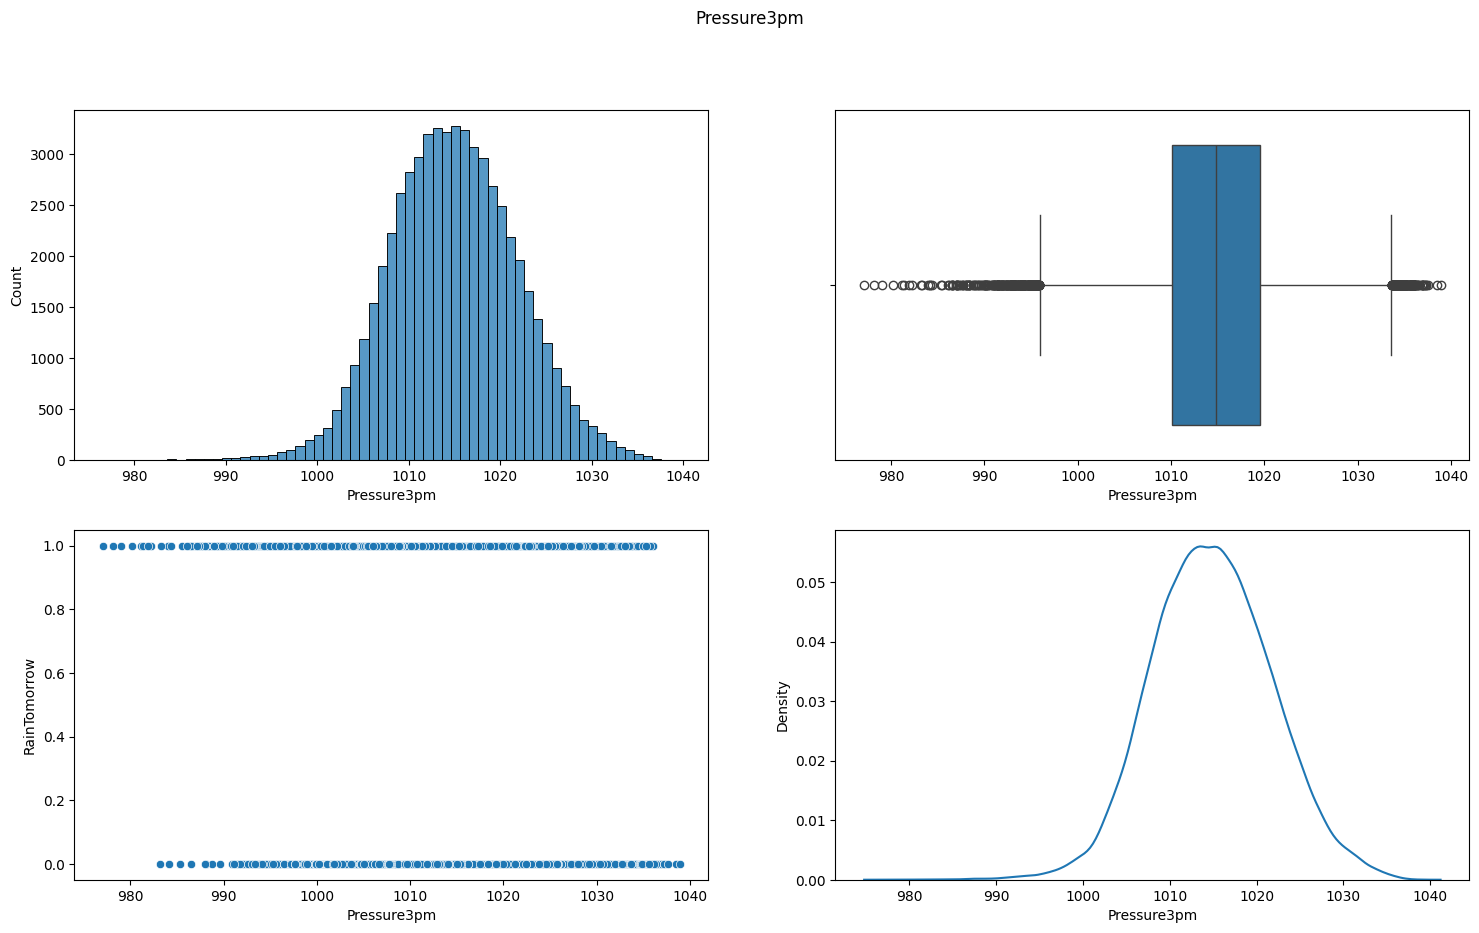

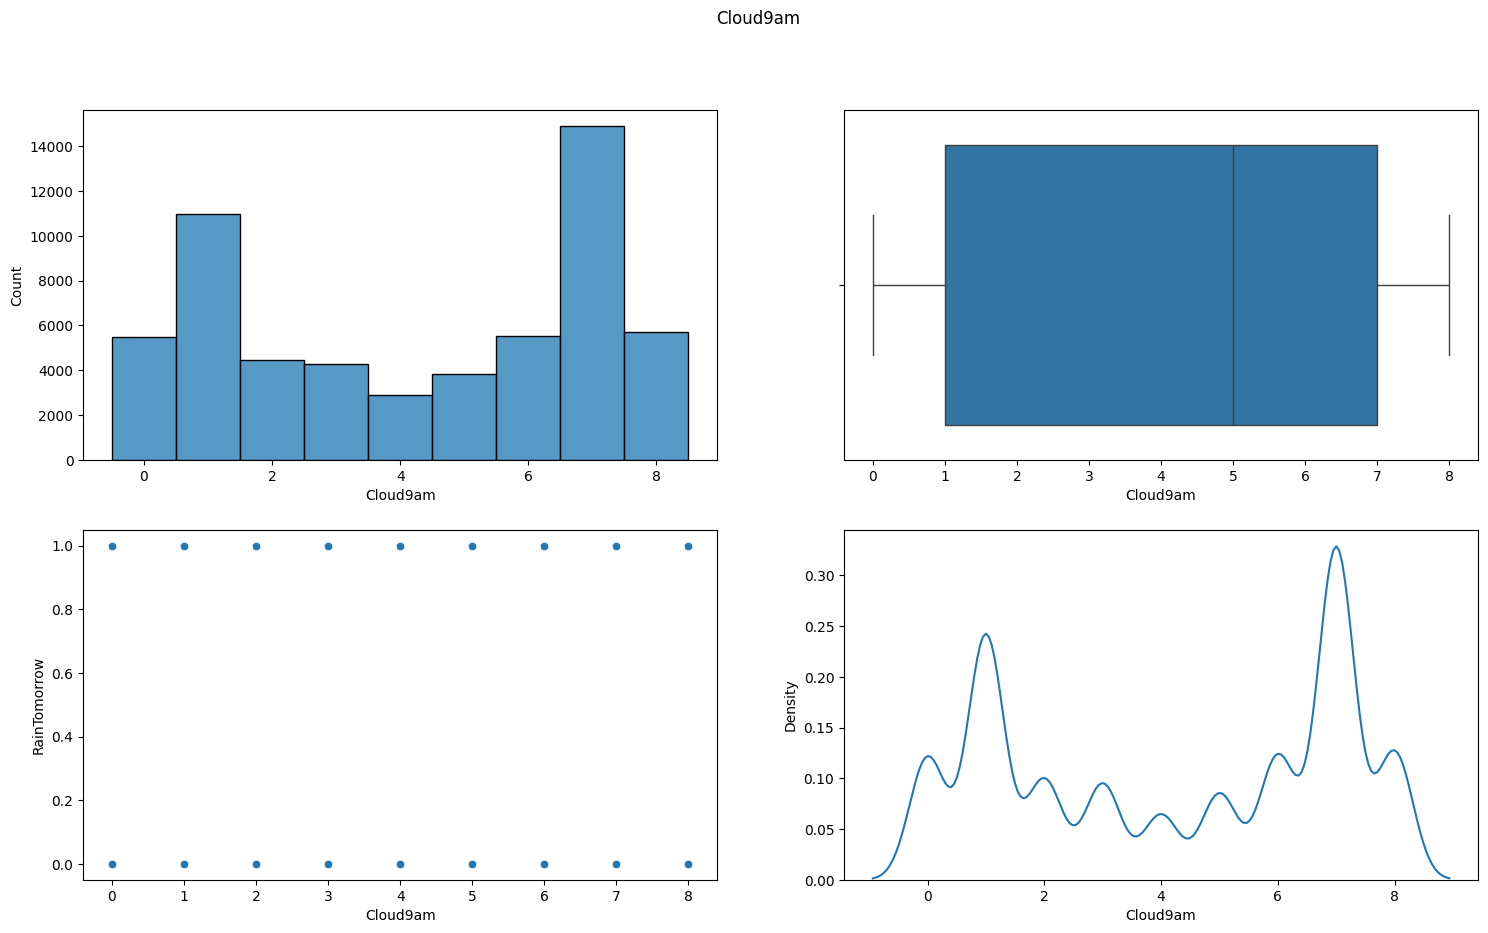

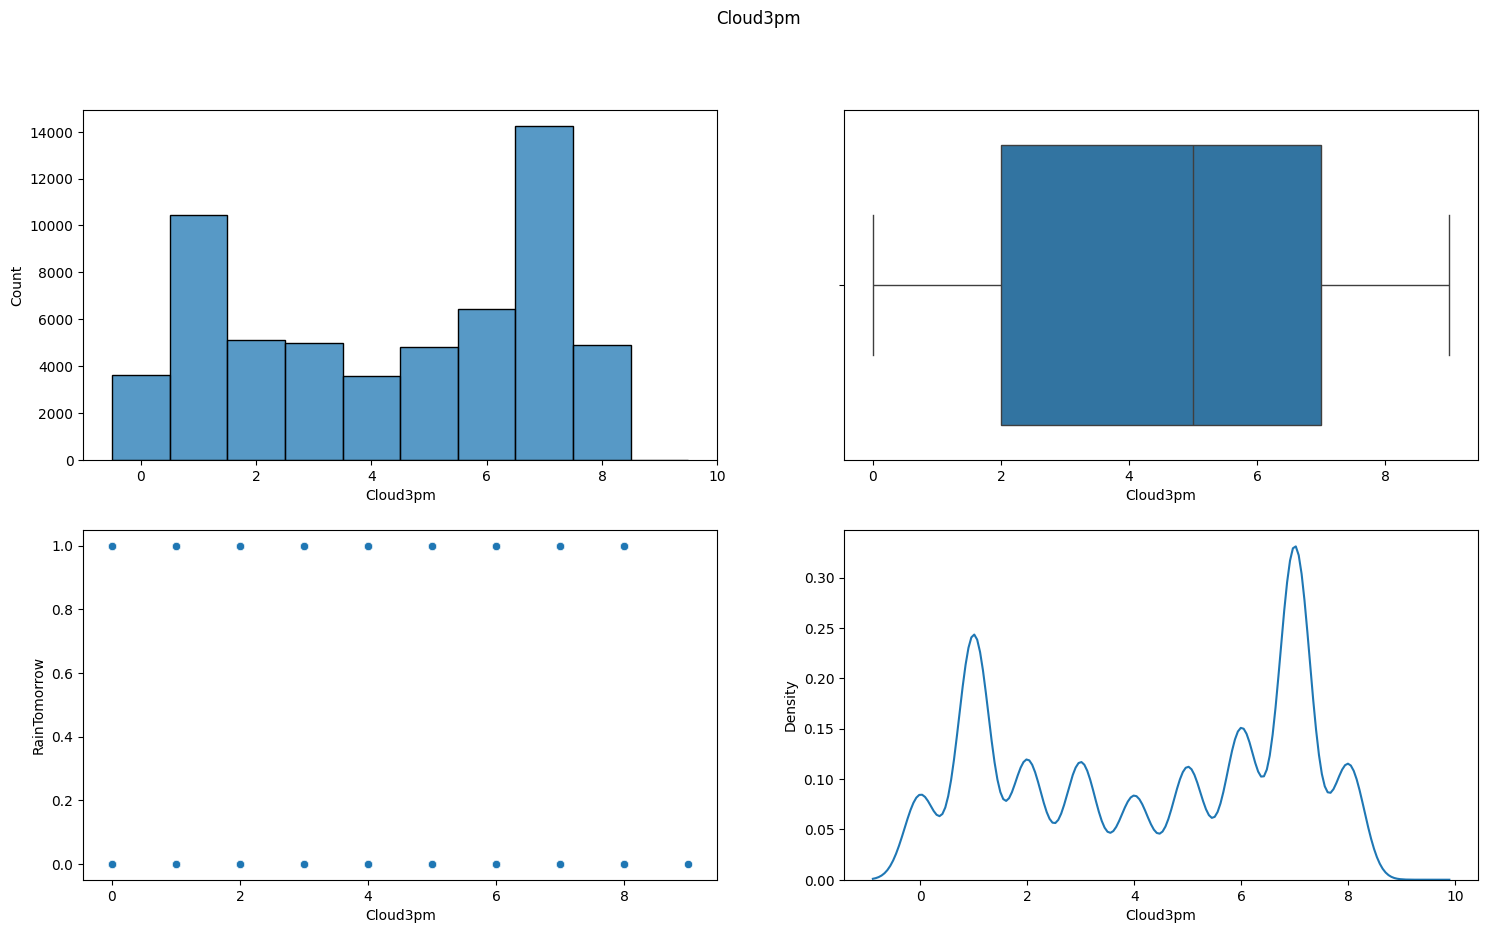

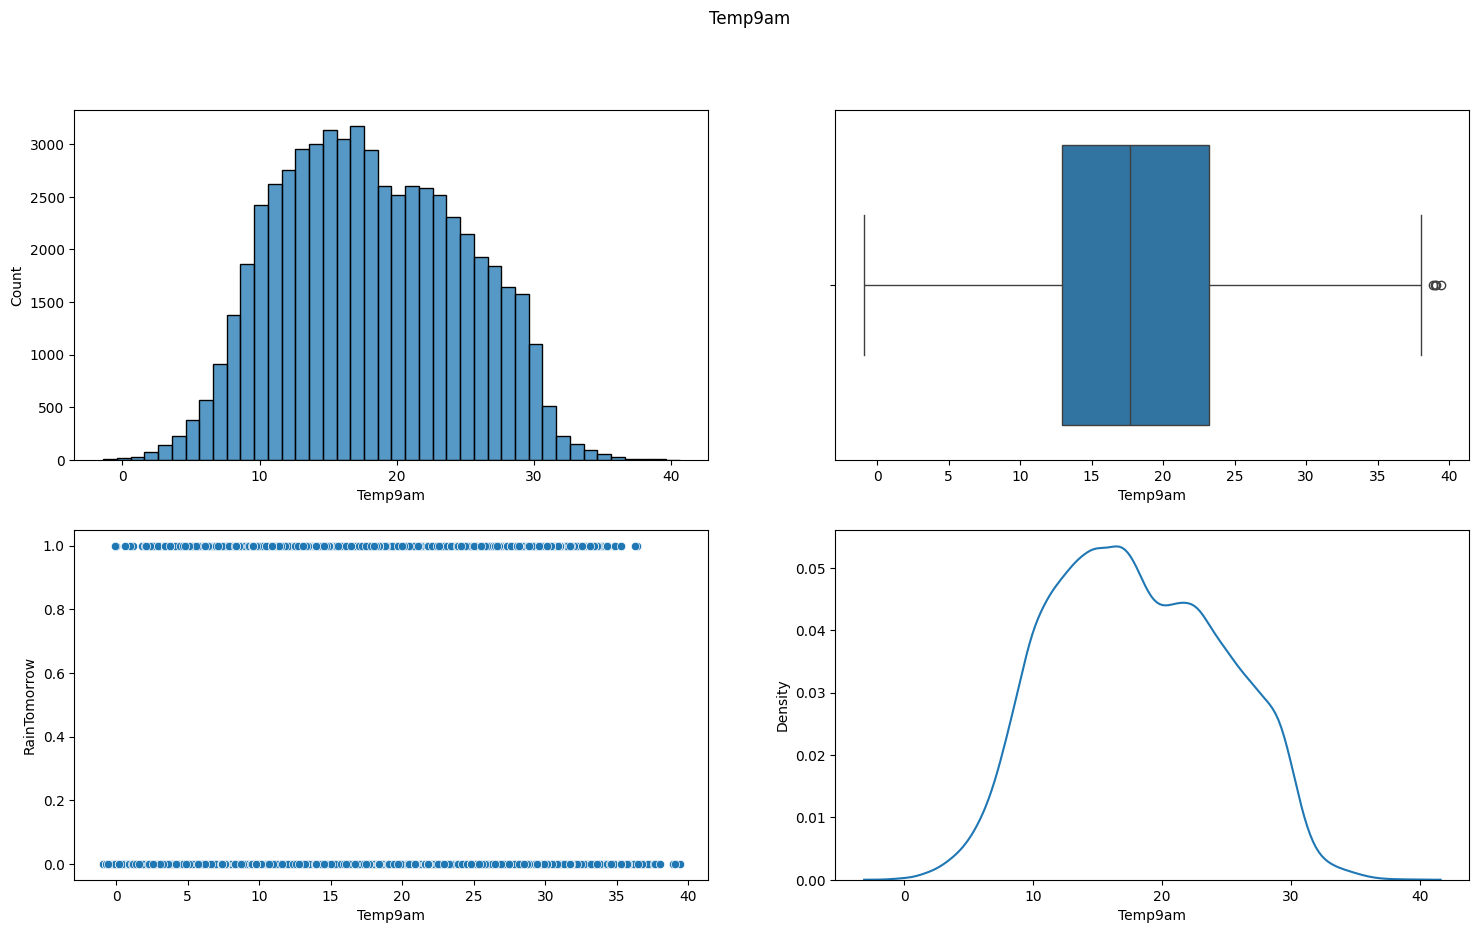

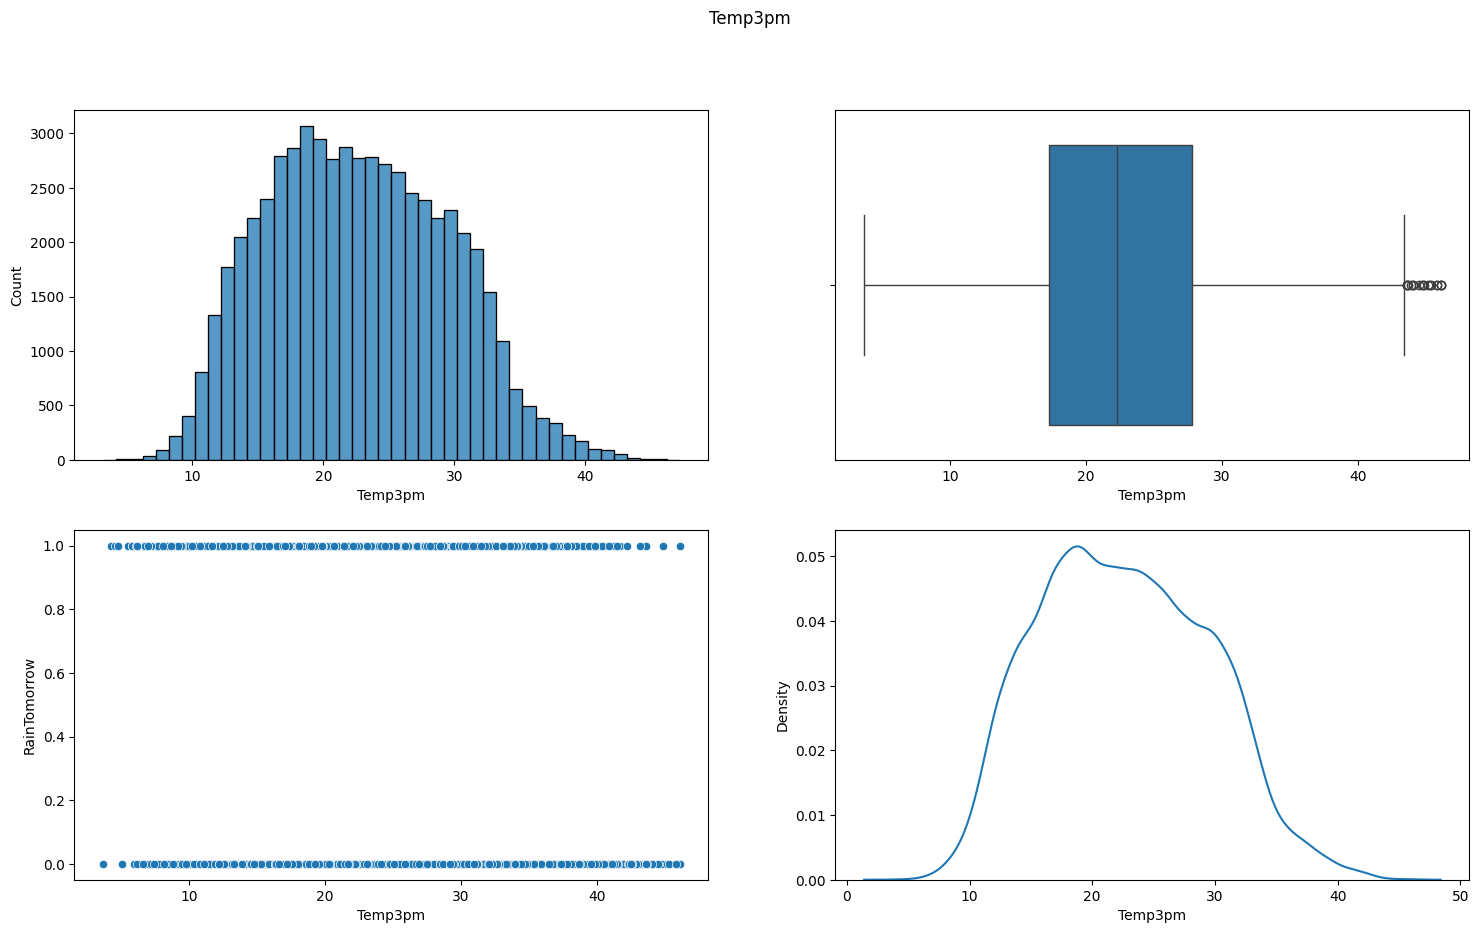

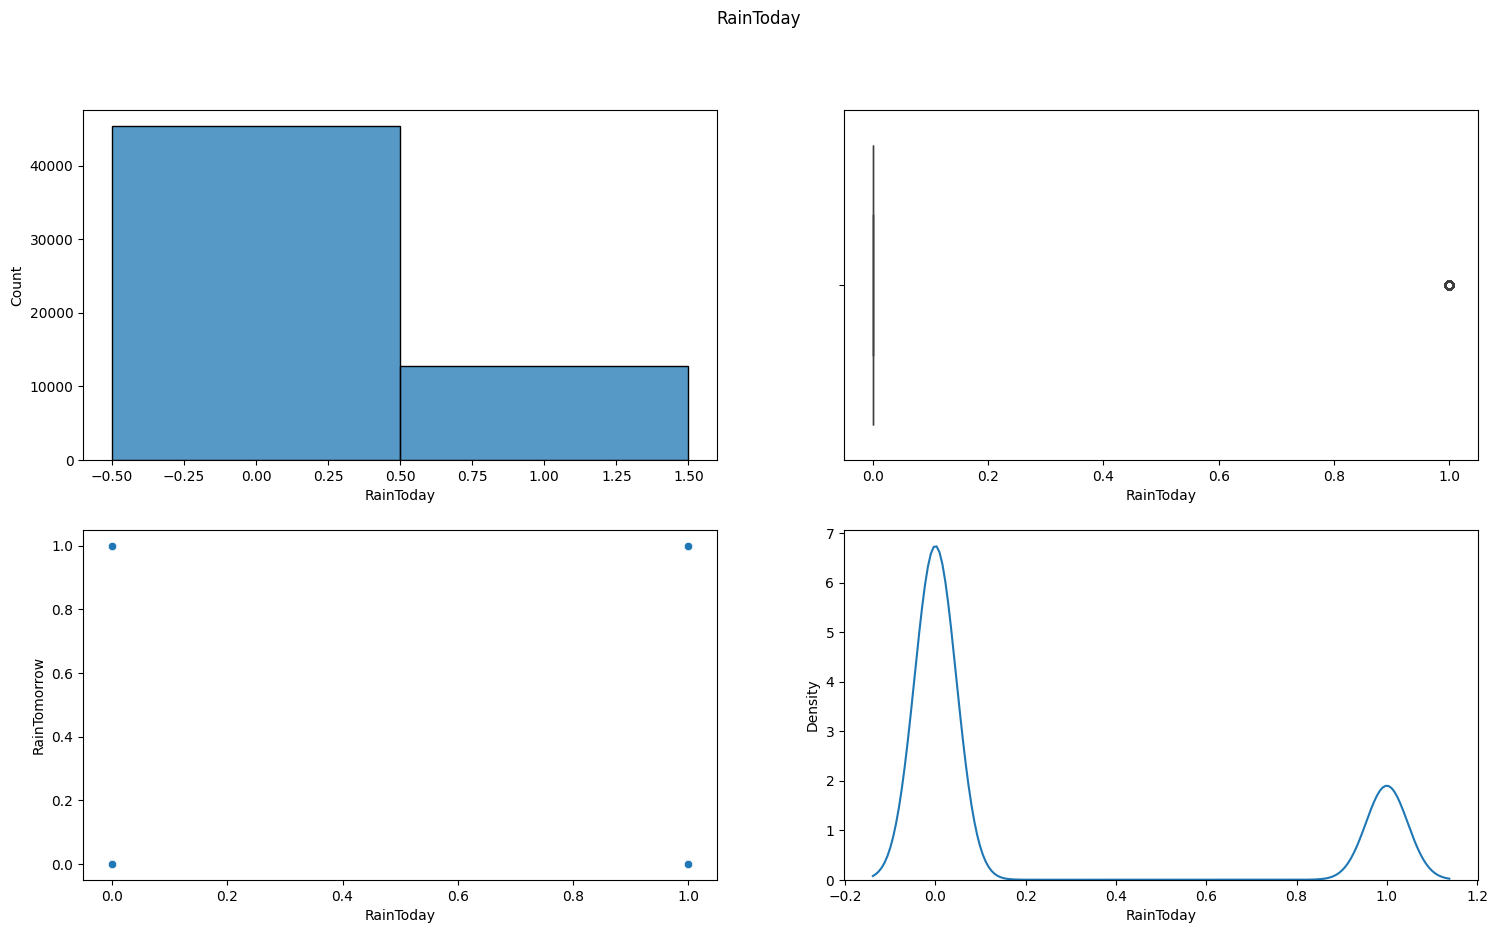

In [27]:
for predictor in predictors.columns:
  draw_plot(df, predictor, target.name)

In [32]:
scaler = StandardScaler()
stan_predictors = scaler.fit_transform(predictors)
print(type(stan_predictors), stan_predictors.shape, stan_predictors.mean, stan_predictors.std)

<class 'numpy.ndarray'> (58090, 17) <built-in method mean of numpy.ndarray object at 0x7d42ab6620d0> <built-in method std of numpy.ndarray object at 0x7d42ab6620d0>


In [36]:
print("Means per feature:", np.mean(stan_predictors, axis=0))
print("Stds per feature:", np.std(stan_predictors, axis=0))

Means per feature: [-9.00257279e-17 -2.09407671e-16  7.82832417e-17  1.20849754e-16
  6.99656472e-17  1.81274632e-16 -5.01502017e-17  1.78583645e-17
  3.50806777e-16  3.10686615e-17 -2.88473746e-15  1.14410958e-14
 -1.30145889e-16 -3.22918372e-17  4.69699450e-16 -1.74180213e-16
  8.99034104e-17]
Stds per feature: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# # in web page  there is no splitting data to train and test subset, it seems all records used for training the model
# predictors_train, predictors_test, actual_target_train, actual_target_test = train_test_split(predictors, target, shuffle=True, test_size=0.2)

In [37]:
tensor_predictors = torch.FloatTensor(stan_predictors)

In [38]:
type(tensor_predictors)

torch.Tensor

In [42]:
class Autoencoder(nn.Module):
  def __init__(self, input_size, latent_size):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(input_size, 16),
        nn.ReLU(),
        nn.Linear(16, latent_size),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(latent_size, 6),
        nn.ReLU(),
        nn.Linear(6, 12),
        nn.ReLU(),
        nn.Linear(12, input_size),
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x